In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
a=pd.read_csv("50_Startups.csv")

In [3]:
a

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
a.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
a.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
a.rename(columns={"R&D Spend":"RandDspend","Marketing Spend":"marketspend"},inplace=True)

In [8]:
a.head()

,RandDspend,Administration,marketspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
a.drop("State",axis=1,inplace=True)

In [10]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDspend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   marketspend     50 non-null     float64
 3   Profit          50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


array([[<Axes: title={'center': 'RandDspend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'marketspend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

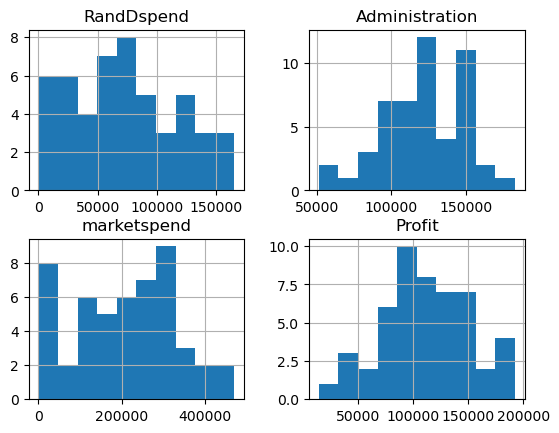

In [11]:
a.hist()

In [12]:
a.isna().sum()

RandDspend        0
Administration    0
marketspend       0
Profit            0
dtype: int64

In [13]:
w1=smf.ols("Profit~marketspend+RandDspend+Administration",data=a).fit()

In [14]:
w1

In [15]:
w1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        16:28:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
marketspend        0.0272      0.016      1.655      0.105      -0.006       0.060
RandDspend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

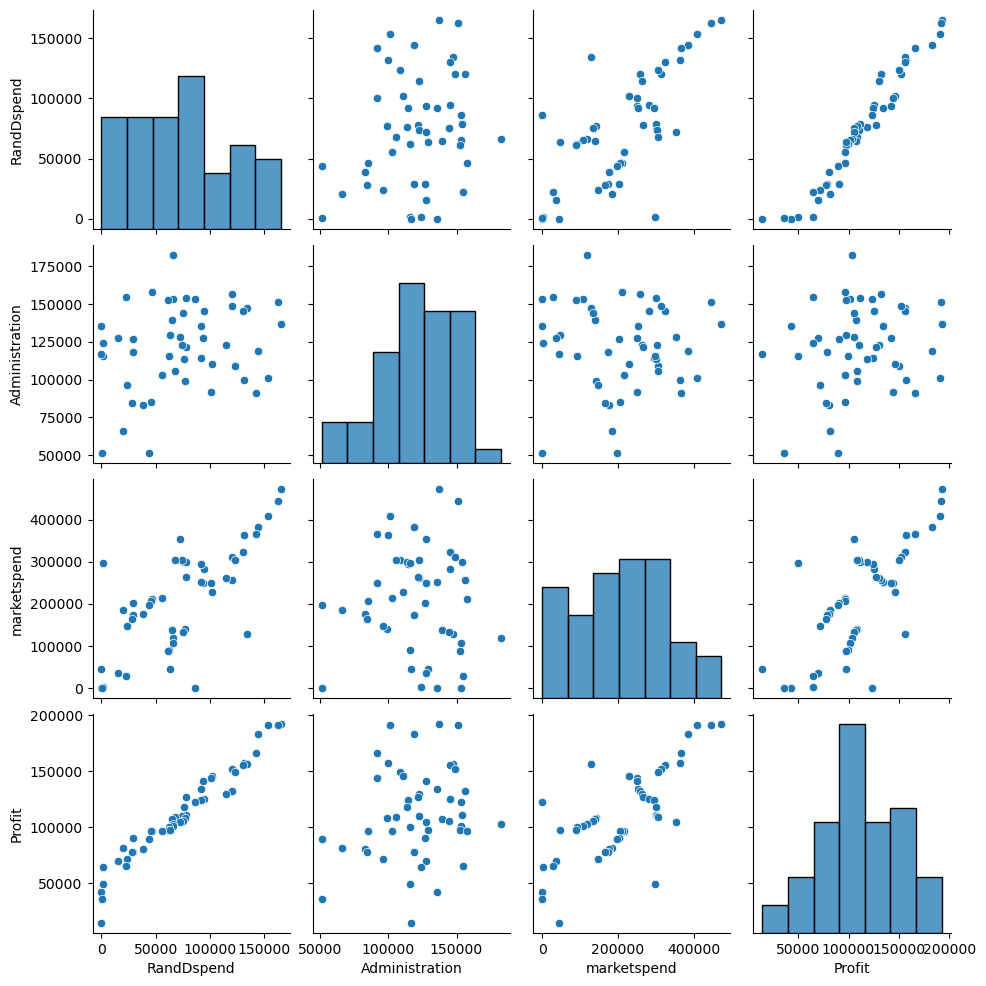

In [16]:
sns.pairplot(a)

In [17]:
w2=smf.ols("Profit~Administration+RandDspend",data=a).fit()

In [18]:
w2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           7.29e-31
Time:                        16:29:00   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
RandDspend         0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
w3=smf.ols("Profit~marketspend+Administration",data=a).fit()

In [20]:
w3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.50e-10
Time:                        16:29:00   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
marketspend        0.2488      0.030      8.281      0.000       0.188       0.309
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#vif=1/(1-rsquared)

In [22]:
m1=smf.ols("Administration~marketspend+RandDspend",data=a).fit()

In [23]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     4.115
Date:                Wed, 15 Nov 2023   Prob (F-statistic):             0.0226
Time:                        16:29:00   Log-Likelihood:                -578.44
No. Observations:                  50   AIC:                             1163.
Df Residuals:                      47   BIC:                             1169.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.173e+05   7749.035     15.141      0.000    1.02e+05    1.33e+05
marketspend    -0.0999      0.045     -2.235      0.030      -0.190      -0.010
RandDspend      0.3405      0.119      2.859      0.006       0.101       0.580
==============================================================================
Omnibus:                        1.684   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.351
Skew:                          -0.401   Prob(JB):                        0.509
Kurtosis:                       2.936   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
vif=m1.rsquared
ad_a=1/(1-vif)

In [25]:
ad_a

1.1750910070550455

In [26]:
m2=smf.ols("marketspend~Administration+RandDspend",data=a).fit()

In [27]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            marketspend   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     31.18
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.41e-09
Time:                        16:29:00   Log-Likelihood:                -635.04
No. Observations:                  50   AIC:                             1276.
Df Residuals:                      47   BIC:                             1282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.75e+05   5.24e+04      3.340      0.002    6.96e+04     2.8e+05
Administration    -0.9615      0.430     -2.235      0.030      -1.827      -0.096
RandDspend         2.0715      0.263      7.890      0.000       1.543       2.600
==============================================================================
Omnibus:                        2.504   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.797
Skew:                          -0.035   Prob(JB):                        0.407
Kurtosis:                       3.926   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
vif1=m2.rsquared
m_a=1/(1-vif1)

In [29]:
m_a

2.3267732905308773

In [30]:
m3=smf.ols("RandDspend~Administration+marketspend",data=a).fit()

In [31]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RandDspend   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     34.52
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           5.97e-10
Time:                        16:29:00   Log-Likelihood:                -584.56
No. Observations:                  50   AIC:                             1175.
Df Residuals:                      47   BIC:                             1181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.711e+04   2.05e+04     -1.807      0.077   -7.84e+04    4199.950
Administration     0.4350      0.152      2.859      0.006       0.129       0.741
marketspend        0.2751      0.035      7.890      0.000       0.205       0.345
==============================================================================
Omnibus:                        3.767   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.001
Skew:                          -0.311   Prob(JB):                        0.223
Kurtosis:                       4.027   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
vif3=m3.rsquared
r_a=1/(1-vif3)

In [33]:
r_a

2.468903069994701

In [34]:
d2={"variables":["Administration","marketspend","RandDsepend"],"vif":[ad_a,m_a,r_a]}

In [35]:
d2

{'variables': ['Administration', 'marketspend', 'RandDsepend'],
 'vif': [1.1750910070550455, 2.3267732905308773, 2.468903069994701]}

In [36]:
a1=pd.DataFrame(d2)

In [37]:
a1

,variables,vif
0,Administration,1.175091
1,marketspend,2.326773
2,RandDsepend,2.468903


In [38]:
mod1=smf.ols("Profit~Administration+RandDspend",data=a).fit()

In [39]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           7.29e-31
Time:                        16:29:00   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
RandDspend         0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
print(mod1.aic)
print(mod1.rsquared)

1059.6636934567293
0.9478129385009173


In [41]:
mod2=smf.ols("Profit~marketspend+RandDspend",data=a).fit()

In [42]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.16e-31
Time:                        16:29:00   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
marketspend     0.0299      0.016      1.927      0.060      -0.001       0.061
RandDspend      0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
print(mod2.aic)
print(mod2.rsquared)

1057.070772191826
0.9504503015559763


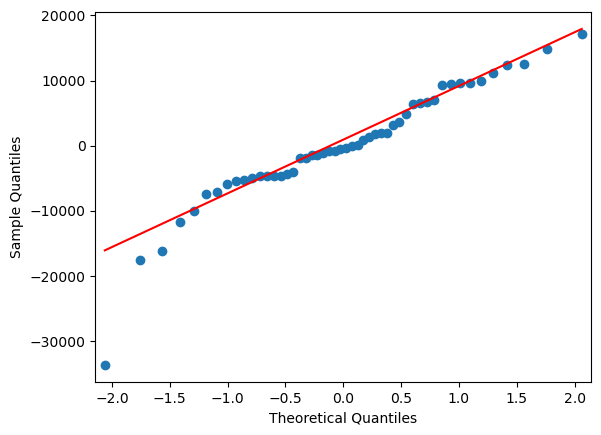

In [44]:
qqplot=sm.qqplot(mod2.resid,line="q")

In [45]:
def standardized(v):
  eqn = (v-v.mean())/v.std()
  return eqn

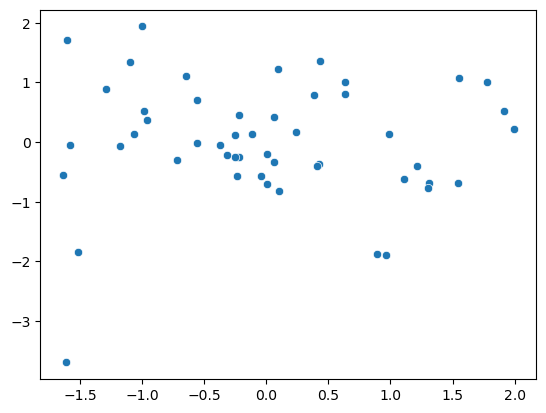

In [46]:
sns.scatterplot(x=standardized(mod1.fittedvalues),y=standardized(mod1.resid))
plt.xlabel=("standardized fitted values")
plt.ylabel=("standardized fitted values")

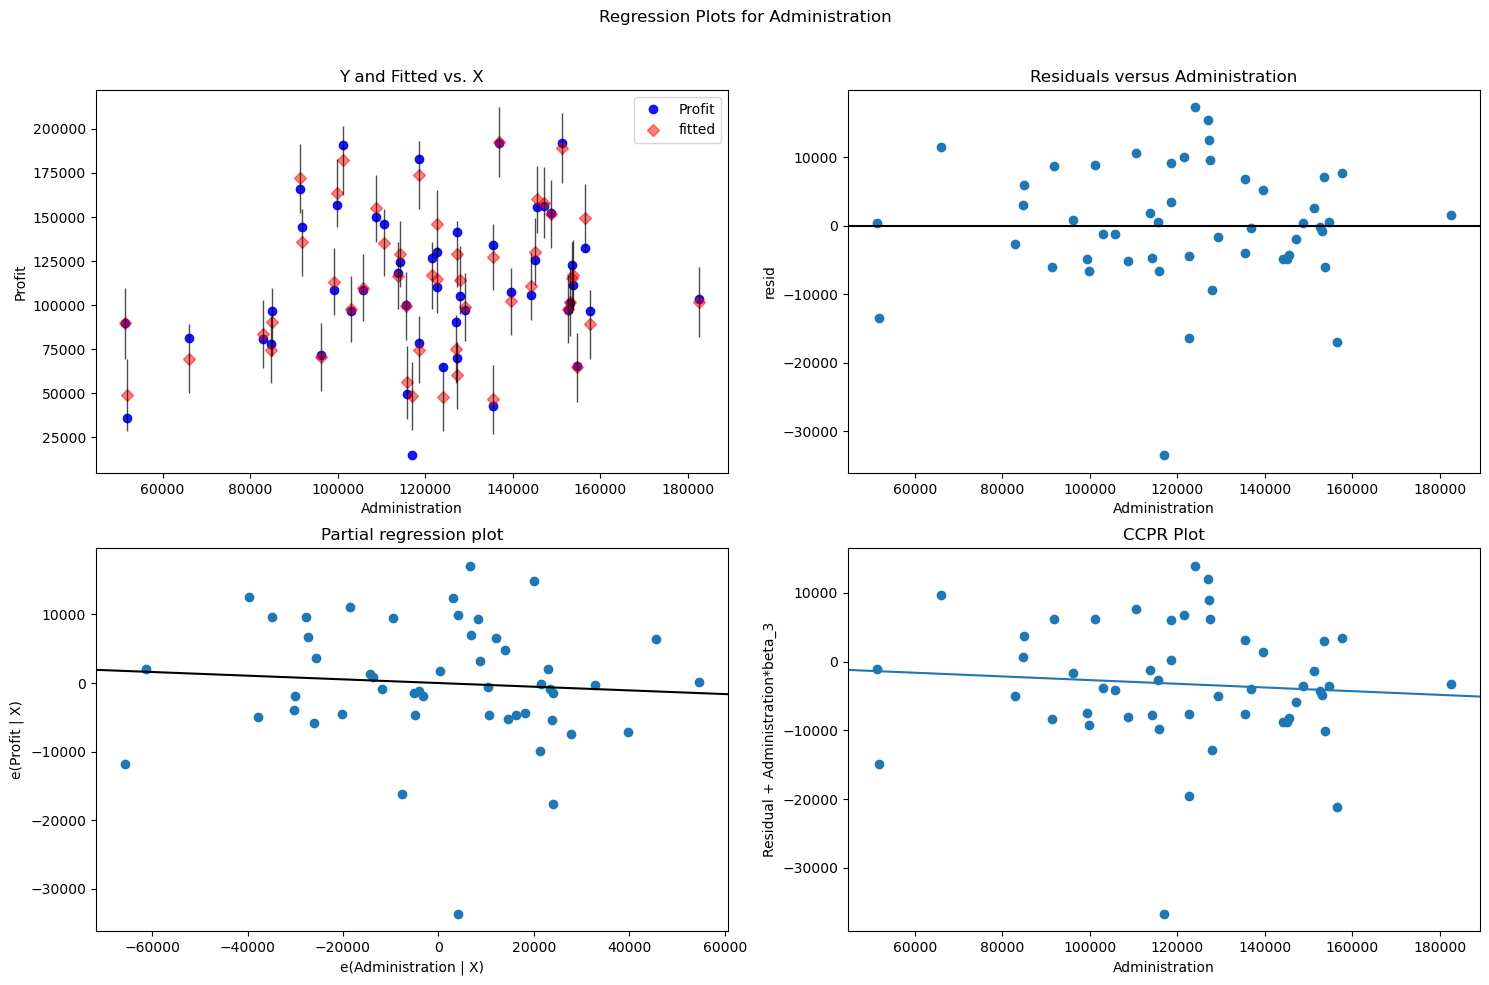

In [47]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(w1,"Administration",fig=fig)
plt.show()

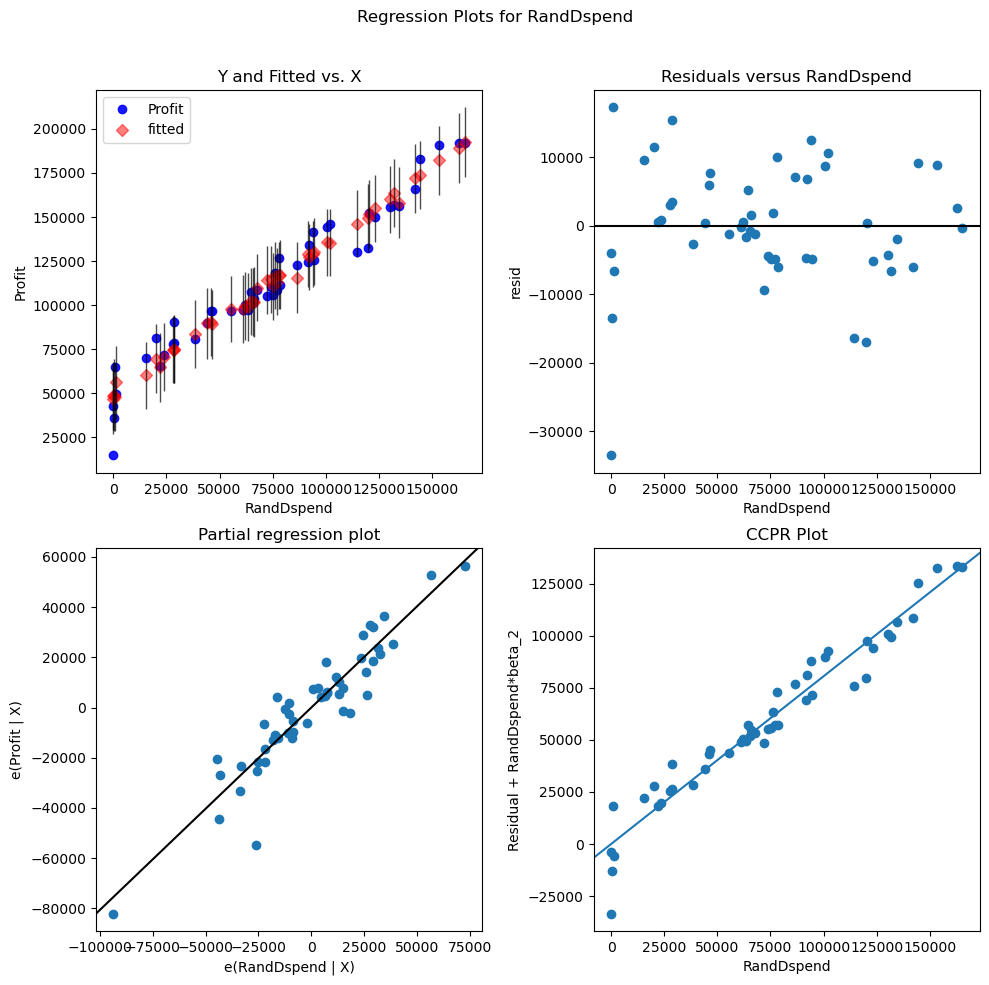

In [48]:
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(w1,"RandDspend",fig=fig)
plt.show()

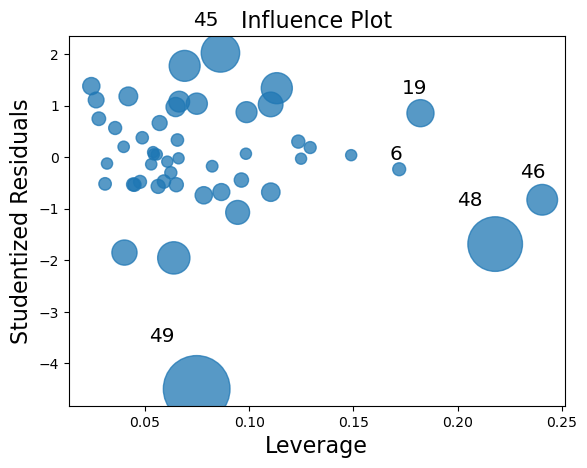

In [49]:
influence_plot(w1)
plt.show()

In [50]:
a.shape

(50, 4)

In [51]:
k=a.shape[1]
n=a.shape[0]
leverage_cutoff=2*((k+1)/n)

In [52]:
leverage_cutoff

0.2

In [53]:
a.head()

,RandDspend,Administration,marketspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [54]:
a1=a.copy

In [55]:
a3=pd.read_csv("50_Startups.csv")

In [56]:
a3.rename(columns={"R&D Spend":"RandDspend","Marketing Spend":"marketspend"},inplace=True)

In [57]:
a3.head()

,RandDspend,Administration,marketspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [58]:
a3.drop("State",axis=1,inplace=True)

In [59]:
a3

,RandDspend,Administration,marketspend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [60]:
a3.describe()

,RandDspend,Administration,marketspend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [61]:
a3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDspend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   marketspend     50 non-null     float64
 3   Profit          50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [62]:
model_influence=w1.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

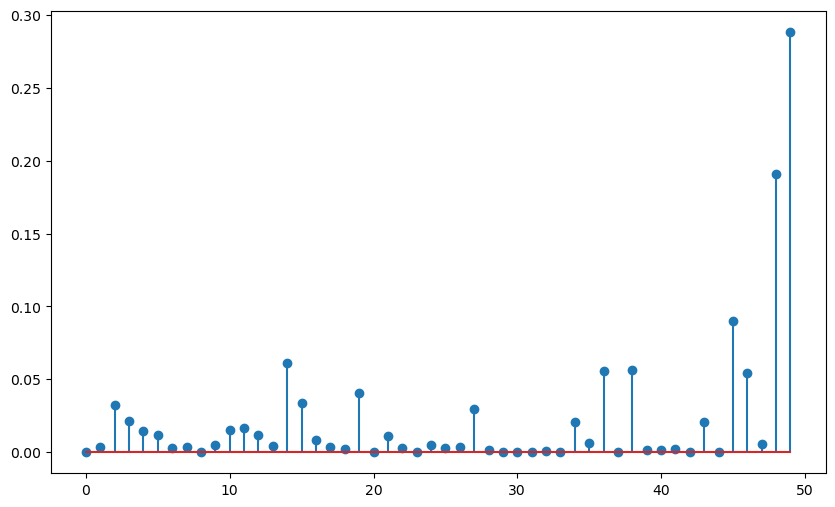

In [63]:
fig=plt.subplots(figsize=(10,6))
plt.stem(np.arange(len(a)),np.round(c,5))
plt.show()

In [64]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543274)

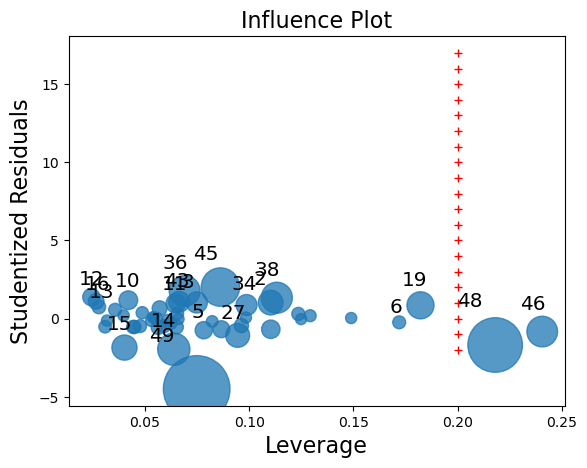

In [65]:
influence_plot(w1,alpha=0.5)
y=[i for i in range(-2,18)]
x=[leverage_cutoff for i in range(20)]
plt.plot(x,y,"r+")
plt.show()

In [66]:
a[a.index.isin([48,46])]

,RandDspend,Administration,marketspend,Profit
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41


In [67]:
# remove 46 and 48 and 49 rows
a1=a.drop(a.index[[46,48,49]],axis=0).reset_index()

In [68]:
a1.tail()

,index,RandDspend,Administration,marketspend,Profit
42,42,23640.93,96189.63,148001.11,71498.49
43,43,15505.73,127382.30,35534.17,69758.98
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,47,0.00,135426.92,0.00,42559.73


In [69]:
final=smf.ols("Profit~marketspend+RandDspend",data=a1).fit()

In [70]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.65e-31
Time:                        16:29:03   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
marketspend     0.0323      0.014      2.376      0.022       0.005       0.060
RandDspend      0.7439      0.037     19.902      0.000       0.669       0.819
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model2=final.get_influence()
(c_v,_)=model2.cooks_distance

<StemContainer object of 3 artists>

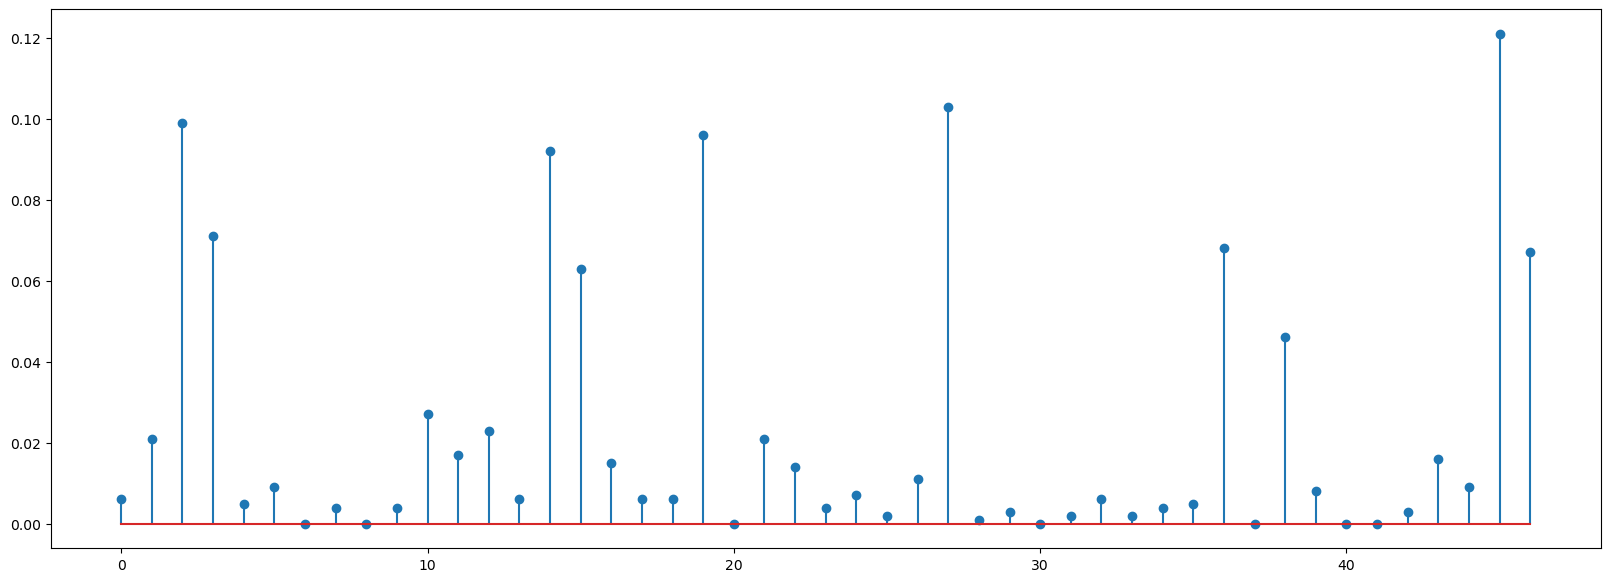

In [72]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a1)),np.round(c_v,3))

<StemContainer object of 3 artists>

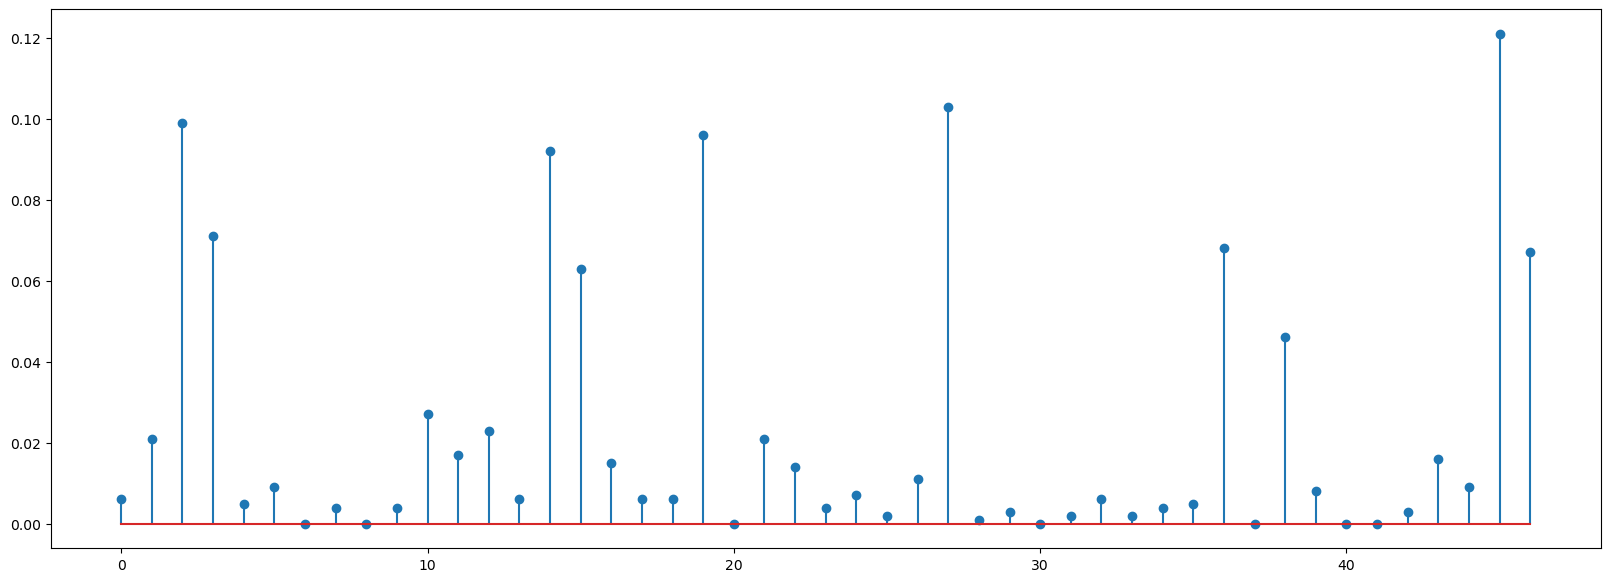

In [73]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a1)),np.round(c_v,3))

In [74]:
# remove 47 row
a1=a.drop(a.index[[45]],axis=0).reset_index()

In [75]:
w=smf.ols("Profit~marketspend+RandDspend",data=a1).fit()

In [76]:
w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     467.7
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.69e-31
Time:                        16:29:04   Log-Likelihood:                -513.45
No. Observations:                  49   AIC:                             1033.
Df Residuals:                      46   BIC:                             1039.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.538e+04   2724.707     16.654      0.000    3.99e+04    5.09e+04
marketspend     0.0336      0.015      2.218      0.032       0.003       0.064
RandDspend      0.8026      0.040     19.976      0.000       0.722       0.884
==============================================================================
Omnibus:                       14.947   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.493
Skew:                          -1.000   Prob(JB):                     3.55e-05
Kurtosis:                       5.457   Cond. No.                     5.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
(final.rsquared,final.aic)

(0.9601156240945741, 972.8030903954616)